# testing with other data

In [ ]:
from pmdarima.arima import auto_arima
from sklearn.metrics import r2_score
from pmdarima.arima import ADFTest
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [68]:
df= pd.read_csv('monthly_crimes_10_21.csv', index_col='Month', parse_dates= True)

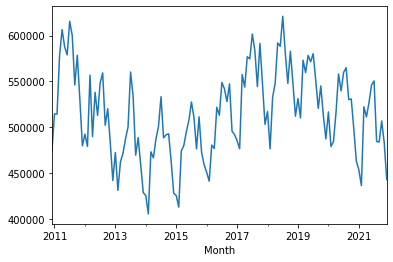

In [69]:
df['Crime type'].plot()

In [70]:
adf_test = ADFTest(alpha=0.05)
adf_test.should_diff(df['Crime type'])

(0.017581947674984676, False)

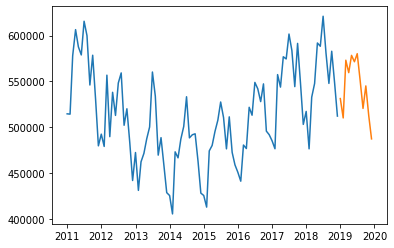

In [71]:
train = df['Crime type'][1:97].to_frame()
test = df['Crime type'][97:109].to_frame()

plt.plot(train)
plt.plot(test)

In [72]:
arima_model = auto_arima(train, start_p=0, d=1, start_q=0,
                       max_p=5, max_d=5, max_q=5, start_P=0,
                       D=1, start_Q=0, max_P=5, max_D=5,
                       max_Q=5, m=12, seasonal=True,
                       error_action='warn', trace=True,
                       supress_warnings=True, stepwise=True,
                       random_state=20, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1924.535, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1918.890, Time=0.08 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1924.184, Time=0.14 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1925.682, Time=0.02 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1920.572, Time=0.23 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.36 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=1918.353, Time=0.09 sec
 ARIMA(1,1,0)(0,1,2)[12]             : AIC=1919.614, Time=0.30 sec
 ARIMA(1,1,0)(1,1,2)[12]             : AIC=inf, Time=0.77 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=1938.125, Time=0.09 sec
 ARIMA(2,1,0)(0,1,1)[12]             : AIC=1920.833, Time=0.16 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1926.185, Time=0.27 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=1910.676, Time=0.33 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=1917.623, Time=0.11 sec
 ARIMA(2,1,1)(1,1,1)[12]     

In [73]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   96
Model:             SARIMAX(3, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -941.942
Date:                            Tue, 05 Apr 2022   AIC                           1897.884
Time:                                    14:46:50   BIC                           1914.816
Sample:                                         0   HQIC                          1904.687
                                             - 96                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6425      0.207     -3.109      0.002      -1.048      -0.237
ar.L2         -0.0805      0.088     -0.919      0.358      -0.252       0.091
ar.L3          0.1610      0.092      1.758      0.079      -0.019       0.341
ma.L1          0.5825      0.213      2.735      0.006       0.165       1.000
ar.S.L12       0.6540      0.127      5.158      0.000       0.405       0.902
ma.S.L12      -0.8546      0.156     -5.464      0.000      -1.161      -0.548
sigma2      4.023e+08   3.02e-10   1.33e+18      0.000    4.02e+08    4.02e+08
===================================================================================
Ljung-Box (Q):                       70.77   Jarque-Bera (JB):                 2.96
Prob(Q):                              0.00   Prob(JB):                         0.23
Heteroskedasticity (H):               0.54   Skew:                             0.38
Prob(H) (two-sided):                  0.11   Kurtosis:                         3.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.45e+34. Standard errors may be unstable.
"""

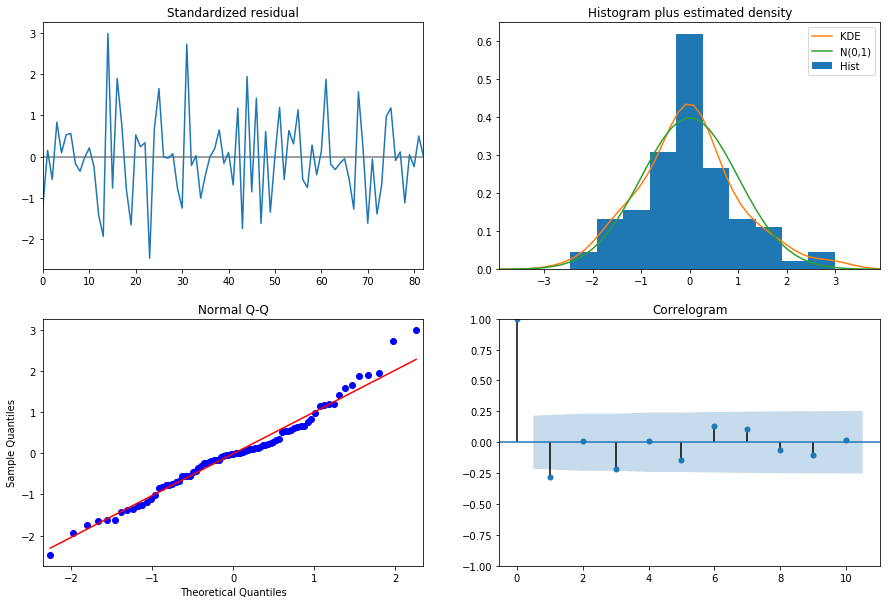

In [74]:
arima_model.plot_diagnostics(figsize=(15,10))
plt.show()

In [75]:
prediction = pd.DataFrame(arima_model.predict(n_periods=12),index=test.index)
prediction.columns = ['predicted crimes']
prediction

,predicted crimes
Month,
2019-01-01,529036.737137
2019-02-01,496247.640035
2019-03-01,550077.890071
2019-04-01,561133.765019
2019-05-01,600619.337568
2019-06-01,597683.903707
2019-07-01,629386.921707
2019-08-01,593479.365252
2019-09-01,563464.179672


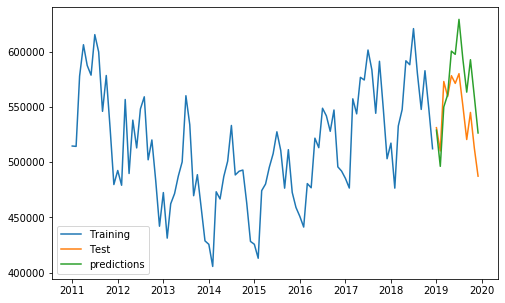

In [77]:
plt.figure(figsize=(8,5))
plt.plot(train,label='Training')
plt.plot(test,label='Test')
plt.plot(prediction, label='predictions')
plt.legend(loc='left corner')
plt.savefig('Test_train_prediction.png')

In [78]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
                                 # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 
            'corr':corr, 'minmax':minmax})

In [79]:
forecast_accuracy(prediction['predicted crimes'], test['Crime type'])

{'mape': 0.05516901251160924,
 'me': 23250.667617770436,
 'mae': 29779.12307725282,
 'mpe': 0.04322686013394713,
 'rmse': 34115.72947595643,
 'corr': 0.730396277809742,
 'minmax': 0.05162905753764868}

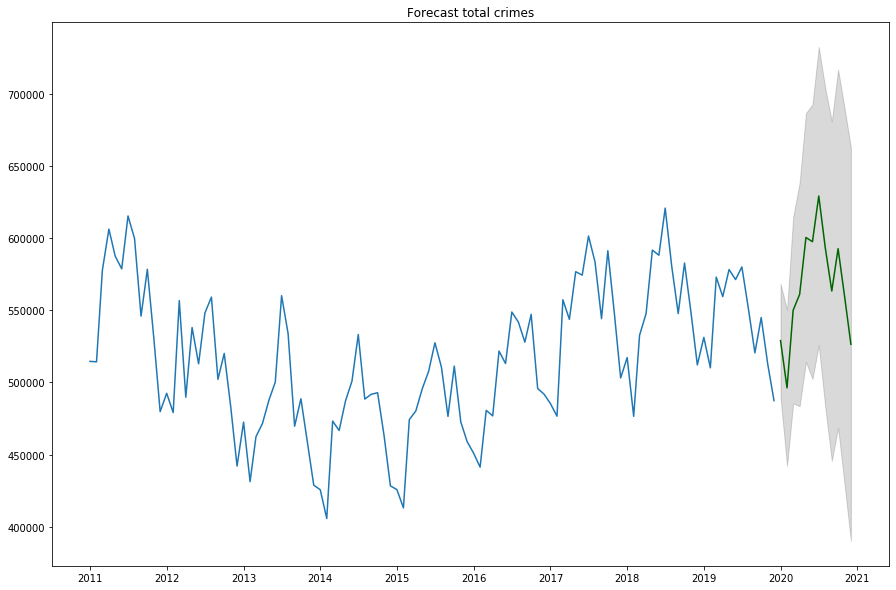

In [80]:
# Forecast
train = df['Crime type'][1:109].to_frame()
n_periods = 12
fc, confint = arima_model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(start='2020-01-01', end='2020-12-01', freq='MS')#np.arange(len(df), len(df)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.figure(figsize=(15,10))
plt.plot(train)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Forecast total crimes")
plt.show()